<a href="https://colab.research.google.com/github/arepevanatalia/AB-Testing/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_3_4_8_M4_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="align: center;"><img align=center src="https://mailfit.com/wp-content/uploads/2019/11/lego-5.png"  width=900></p>
<h1 style="text-align: center;"><b>«Домашняя работа»</b></h3>


## Импорт Библиотек

In [ ]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Импорт данных

In [ ]:
data_path = "https://raw.githubusercontent.com/a-milenkin/mipt_data_science_2021/main/data/people_data_clustering.csv"
data = pd.read_csv(data_path, index_col=0)
print("Размеры датасета", data.shape)
data.head(6)

Размеры датасета (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
5,1,3.0,2.474979e+06,0,21.0,Homemaker,1.001654e+07,1.0,0.326801


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `children` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол (0 - женщина, 1 - мужчина)
* `age` - Возраст
* `home_cost` - Сумарная стоимость жилья/недвижимости
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
* `happyness` - уровень счастья по результатам опроса
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет, выполнить задания и проверить некоторые гипотезы, предложенные ниже, используя только визуализацию.

# Чистка датасета
* Есть ли дубли в данных? Если есть - удалите их (drop_duplicates).
* Найти и удалить/отфильтровать выбросы по признаку `home_cost`. Таких точек около 5

In [ ]:
data.drop_duplicates()

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579
...,...,...,...,...,...,...,...,...,...
495,1,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,1.0,0.599222
496,1,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,1.0,0.259710
497,1,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.0,0.258779


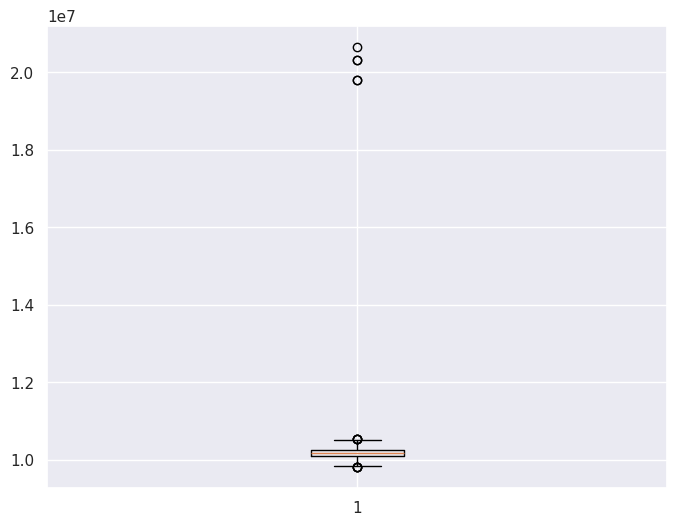

In [ ]:
data.dropna(subset=['home_cost'], inplace=True)
plt.figure(figsize=(8, 6))
plt.boxplot(data['home_cost']);

# Проверка гипотез

# Изучение датасета
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [ ]:
numerical_features = data.select_dtypes(include=np.number).columns.tolist()
print("Численные признаки:")
print(numerical_features)

Численные признаки:
['was_married', 'children', 'salary', 'sex', 'age', 'home_cost', 'drive_info', 'happyness']


In [ ]:
categorical_features = data.select_dtypes(exclude=np.number).columns.tolist()
print("\nКатегориальные признаки:")
print(categorical_features)


Категориальные признаки:
['profession']


In [ ]:
from scipy import stats

print("\nПроверка на нормальное распределение (Shapiro-Wilk test):")
alpha = 0.05

normal_features = []
for feature in numerical_features:

    if data[feature].isnull().any():
        print(f"Признак '{feature}' содержит пропущенные значения, тест Shapiro-Wilk пропущен.")
        continue

    if data[feature].nunique() < 5:
        print(f"Признак '{feature}' имеет слишком мало уникальных значений, тест Shapiro-Wilk пропущен.")
        continue

    if len(data[feature]) > 3:
        stat, p = stats.shapiro(data[feature])
        print(f"Признак: {feature}, Shapiro-Wilk statistic={stat:.3f}, p-value={p:.3f}")
        if p > alpha:
            print(f"Признак '{feature}' имеет нормальное распределение (не отклоняем H0).")
            normal_features.append(feature)
        else:
            print(f"Признак '{feature}' не имеет нормального распределения (отклоняем H0).")
    else:
        print(f"Признак '{feature}' имеет слишком мало данных для теста Shapiro-Wilk.")

print("\nПризнаки с нормальным распределением (на основе Shapiro-Wilk):")
print(normal_features)


Проверка на нормальное распределение (Shapiro-Wilk test):
Признак 'was_married' имеет слишком мало уникальных значений, тест Shapiro-Wilk пропущен.
Признак: children, Shapiro-Wilk statistic=0.844, p-value=0.000
Признак 'children' не имеет нормального распределения (отклоняем H0).
Признак: salary, Shapiro-Wilk statistic=0.861, p-value=0.000
Признак 'salary' не имеет нормального распределения (отклоняем H0).
Признак 'sex' имеет слишком мало уникальных значений, тест Shapiro-Wilk пропущен.
Признак: age, Shapiro-Wilk statistic=0.728, p-value=0.000
Признак 'age' не имеет нормального распределения (отклоняем H0).
Признак: home_cost, Shapiro-Wilk statistic=0.221, p-value=0.000
Признак 'home_cost' не имеет нормального распределения (отклоняем H0).
Признак 'drive_info' содержит пропущенные значения, тест Shapiro-Wilk пропущен.
Признак: happyness, Shapiro-Wilk statistic=0.996, p-value=0.000
Признак 'happyness' не имеет нормального распределения (отклоняем H0).

Признаки с нормальным распределен

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)



Признаки с одним уникальным значением (потенциально бессмысленные):
[]

Визуализация распределений численных признаков:


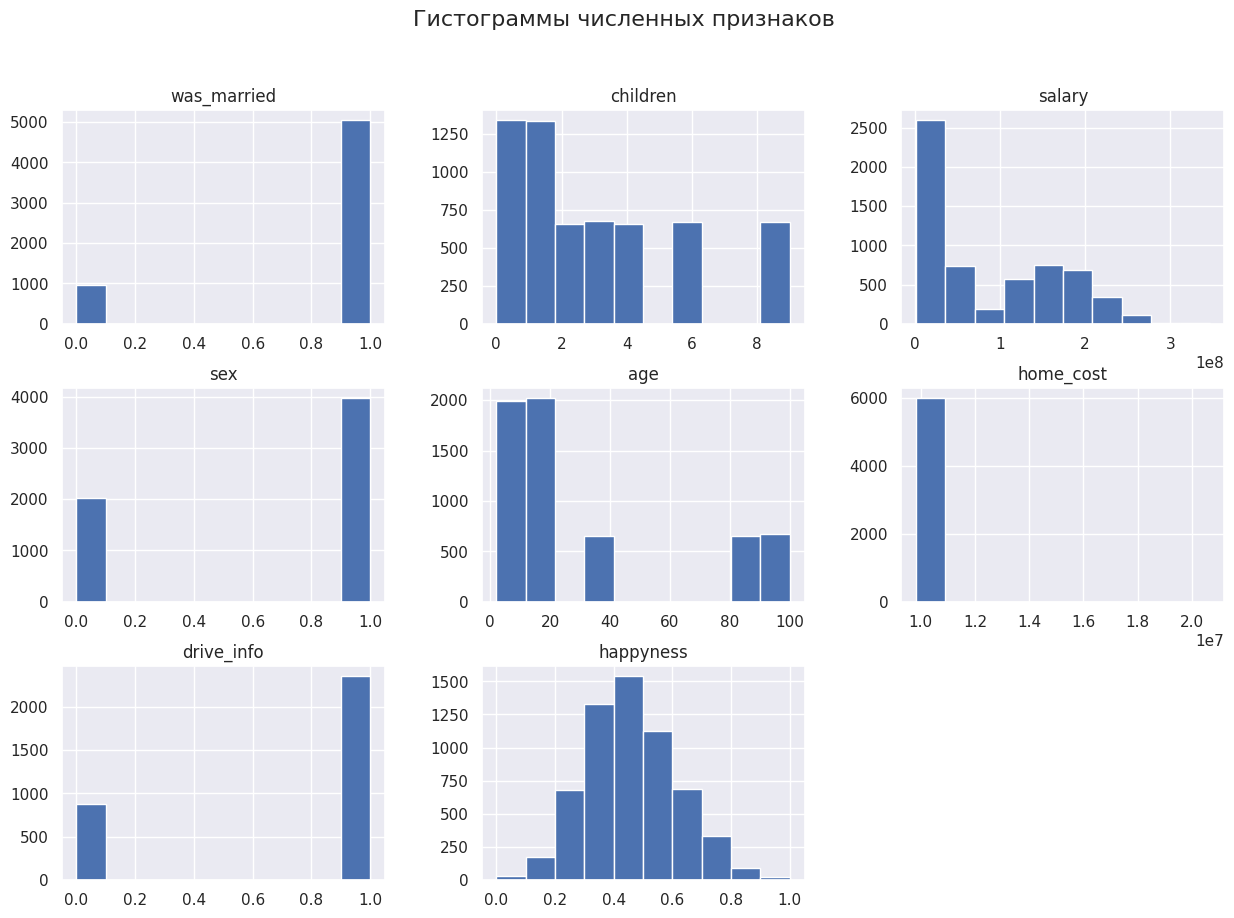


Визуализация категориальных признаков:


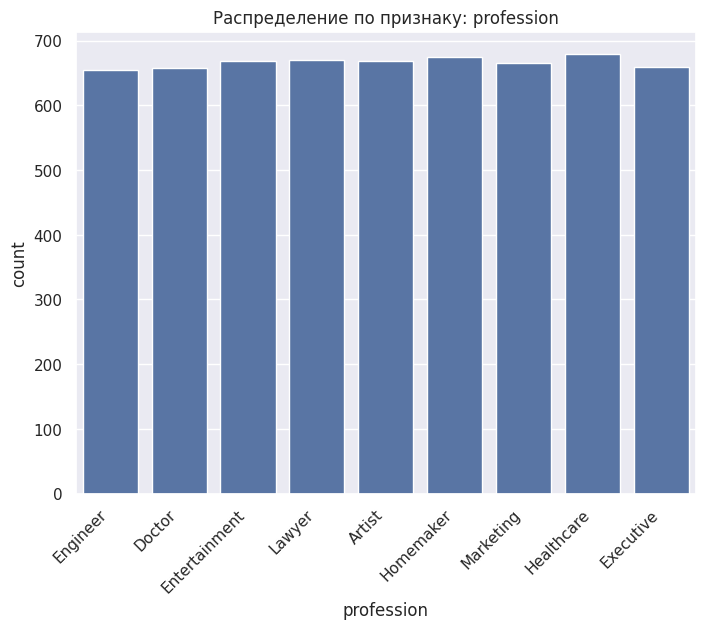


Пропущенные значения:
was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64


In [ ]:
single_value_features = []
for feature in data.columns:
    if data[feature].nunique(dropna=True) == 1:
        single_value_features.append(feature)

print("\nПризнаки с одним уникальным значением (потенциально бессмысленные):")
print(single_value_features)

print("\nВизуализация распределений численных признаков:")
data[numerical_features].hist(figsize=(15, 10))
plt.suptitle("Гистограммы численных признаков", fontsize=16)
plt.show()

print("\nВизуализация категориальных признаков:")
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=data)
    plt.title(f"Распределение по признаку: {feature}")
    plt.xticks(rotation=45, ha="right")
    plt.show()

print("\nПропущенные значения:")
print(data.isnull().sum())

<div class="alert alert-info">
    
Перед вами те же гипотезы, которые были в прошлом домашнем задании. Вы уже научились проверять эти утверждения визуально. Теперь же, помимо визуальной состовляющей вам еще нужно применить подходящий статистический критерий, чтобы окончательно доказать или опровергнуть гипотезы на снове этих данных. В качестве уровня значимости принять 5%

* Правда ли женщины в среднем имеют более высокую зарплату, чем мужчины?

MannwhitneyuResult(statistic=2033118.0, pvalue=3.2327873836155033e-217)

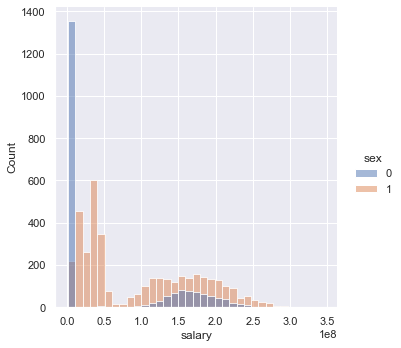

* Правда ли, что инженеры (Engineer) зарабатывают в среднем больше, чем люди из сферы развлечений (Entertainment)?

Ttest_indResult(statistic=-100.23327557436038, pvalue=0.0)

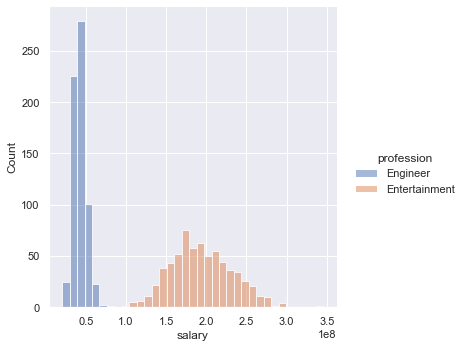

* Правда ли, что те, у кого больше трех детей зарабатывают в среднем больше, чем те, у кого меньше или трое детей?

MannwhitneyuResult(statistic=2113600.0, pvalue=1.7204616480546744e-194)

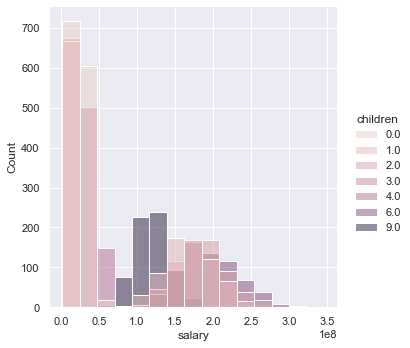

* Правда ли, что дома художники (Artist) живут в домах, которые в среднем дороже или дешевле, чем дома адвокатов (Lawyer)?

Ttest_indResult(statistic=-10.422866126030229, pvalue=1.6456526985141669e-24)

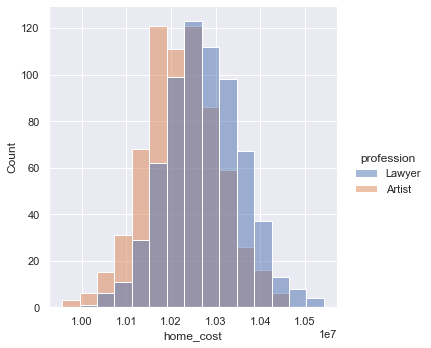

* Правда ли, что недвижимость у тех, кто когда либо был в браке в среднем дороже, чем у тех, кто никогда не был в браке?


Ttest_indResult(statistic=-28.10532125782135, pvalue=2.2517376196728854e-163)

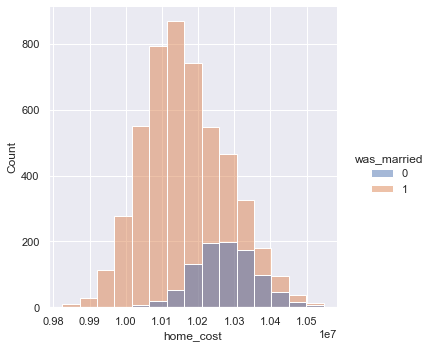

* Правда ли, что мужчины в среднем чаще бывают в браке, чем женщины?

**Подсказка** - Составьте матрицу смежности и воспользуйтесь критерием хи-квадрат из библиотеки scipy

,was,not_was
sex,,
0,1358,670
1,3689,278


Правда ли, что женщины с зарплатой выше медианной в среднем более счастливые, чем мужчины с зарплатой, которая выше средней?